In [1]:
# Import the packages

import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import os

# Any results you write to the current directory are saved as output.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dmkd/24. Mushrooms.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 8124 rows and 23 columns.


In [6]:
 df =df.drop(["veil-type"], axis=1)

# **Data Preprocessing**

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
# Replace the column names with your actual column names

columns_to_encode = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                     'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                     'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                     'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
                     'spore-print-color', 'population', 'habitat']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Now, 'df' contains the numeric representation of the categorical values in the specified columns


In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Describing the statistical inference from our dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

# **Exploring the dataset**

class is the target column in the dataset. clase '1' is with edible is without poisonous, we get their total counts in the dataset. Other columns in the dataset will be input to the models. Let us have a look at the count of Outcome columns.

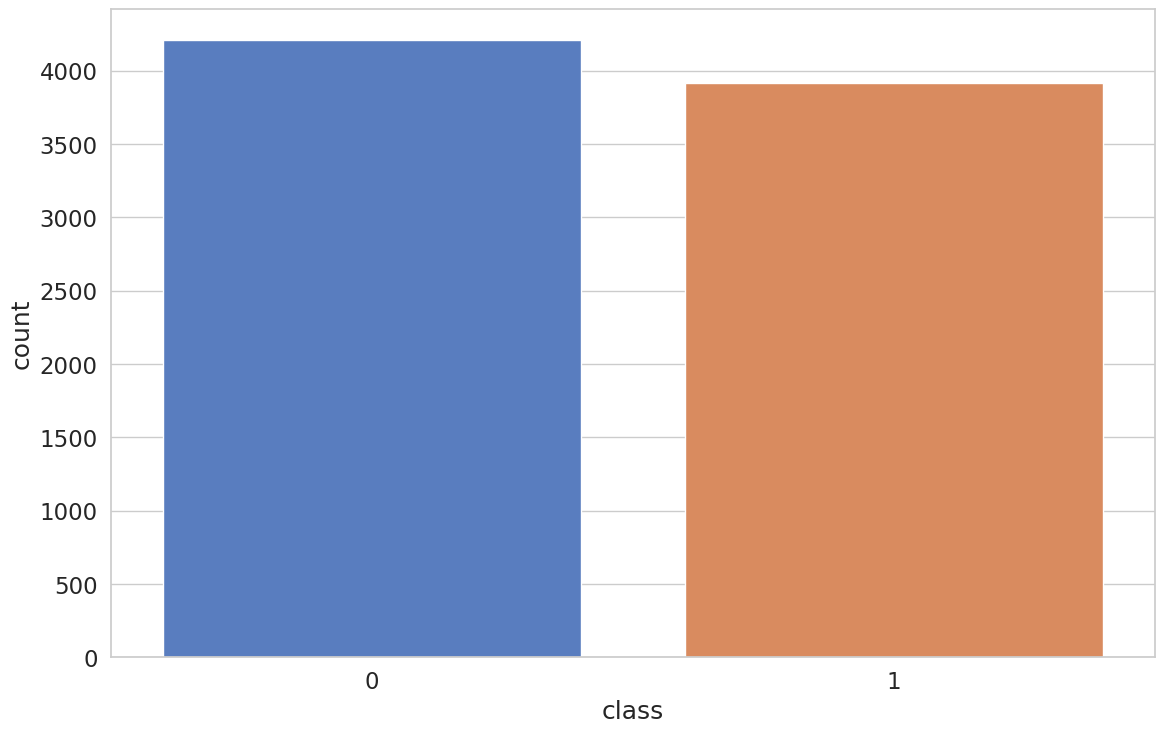

In [11]:
sns.countplot(x='class',data=df)
plt.show()

In [12]:
grouped = df.groupby('class').agg({'cap-shape':['mean', 'std', min, max],
                                      'cap-surface':['mean', 'std', min, max],
                                      'cap-color':['mean', 'std', min, max],
                                      'bruises':['mean', 'std', min, max],
                                      'odor':['mean', 'std', min, max],
                                      'gill-attachment':['mean', 'std', min, max],
                                      'gill-spacing':['mean', 'std', min, max],
                                      'gill-size':['mean', 'std', min, max],
                                      'gill-color':['mean', 'std', min, max],
                                      'stalk-shape':['mean', 'std', min, max],
                                      'stalk-root':['mean', 'std', min, max],
                                      'stalk-surface-above-ring':['mean', 'std', min, max],
                                      'stalk-surface-below-ring':['mean', 'std', min, max],
                                      'stalk-color-above-ring':['mean', 'std', min, max],
                                      'stalk-color-below-ring':['mean', 'std', min, max],

                                      'veil-color':['mean', 'std', min, max],
                                      'ring-number':['mean', 'std', min, max],
                                      'ring-type':['mean', 'std', min, max],
                                      'spore-print-color':['mean', 'std', min, max],
                                      'population':['mean', 'std', min, max],
                                      'habitat':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

<ipython-input-12-b913fb11c0c1>:24: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]


,cap-shape_mean,cap-shape_std,cap-shape_min,cap-shape_max,cap-surface_mean,cap-surface_std,cap-surface_min,cap-surface_max,cap-color_mean,cap-color_std,...,spore-print-color_min,spore-print-color_max,population_mean,population_std,population_min,population_max,habitat_mean,habitat_std,habitat_min,habitat_max
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.741419,0,5,1.615970,1.301241,0,3,4.581749,2.434982,...,0,8,3.283270,1.550845,0,5,1.148289,1.588186,0,6
1,3.436159,1.437594,0,5,2.055158,1.104049,0,3,4.421859,2.657604,...,1,7,4.031665,0.614859,1,5,1.895812,1.771456,0,5


<ipython-input-13-65c71318122d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df['class'] == 1], bins=50)
<ipython-input-13-65c71318122d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df['class'] == 0], bins=50)
<ipython-input-13-65c71318122d>:8: UserWarning: 

`distplot` is 

<Figure size 1200x800 with 0 Axes>

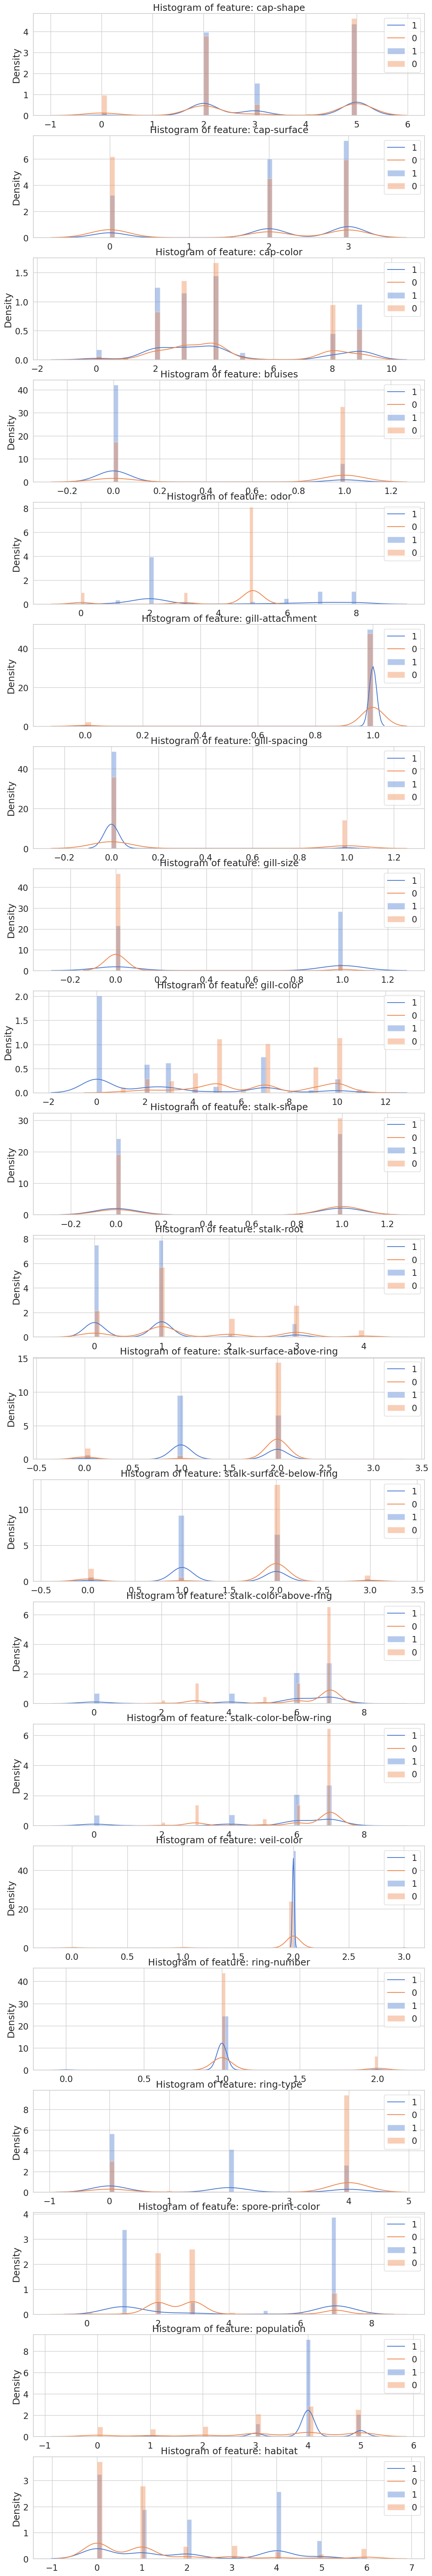

In [13]:
plt.subplots_adjust(top=5)
columns = df.columns[1:23]
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df['class'] == 1], bins=50)
    sns.distplot(df[cn][df['class'] == 0], bins=50)
    ax.set_xlabel('')
    ax.legend(['1', '0', '1', '0'])
    ax.set_title('Histogram of feature: ' + str(cn))

plt.show()


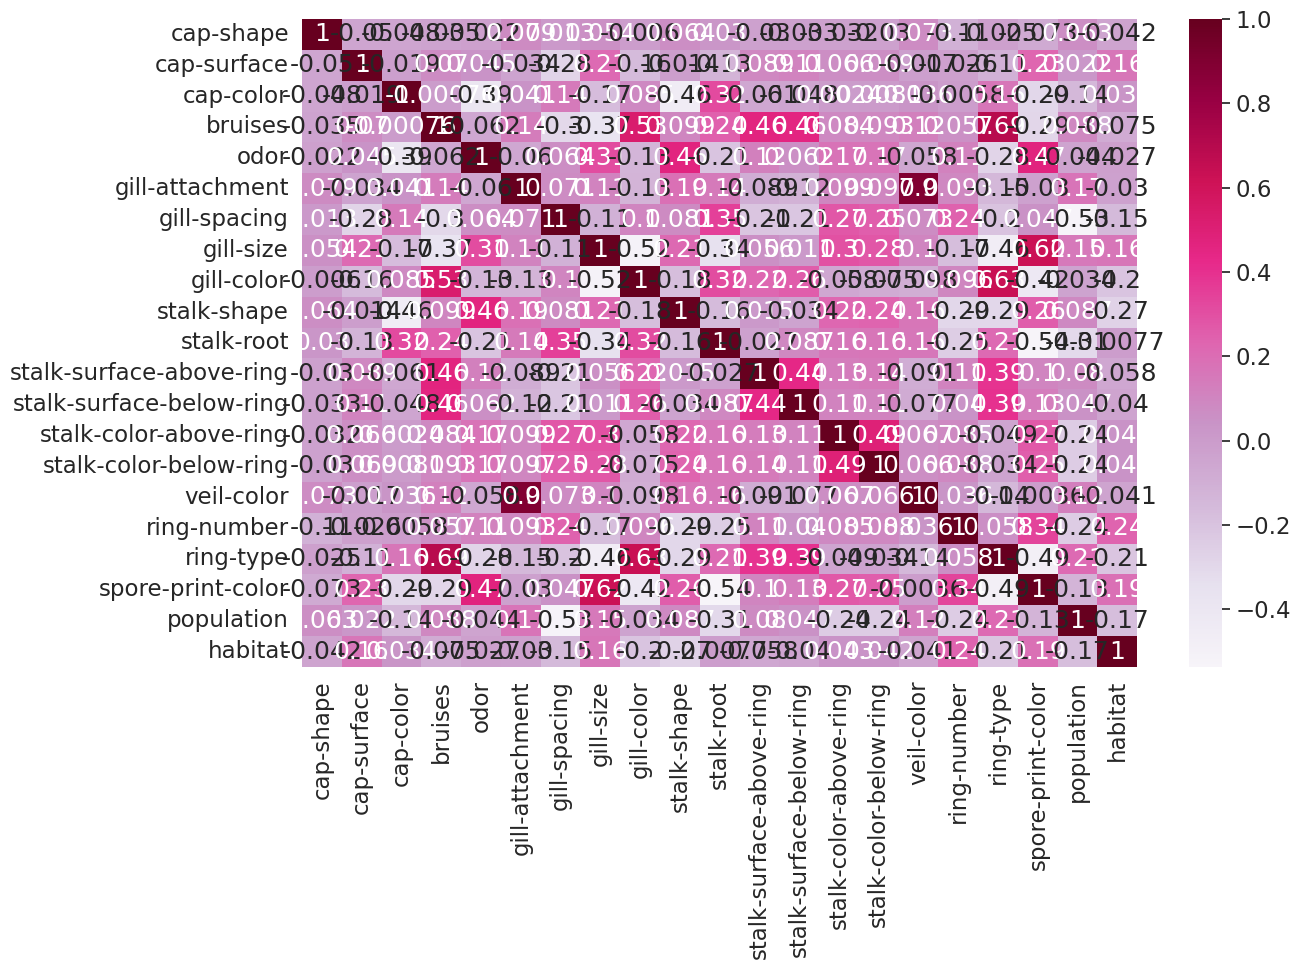

In [14]:
sns.heatmap(df[df.columns[1:23]].corr(),annot=True,cmap='PuRd')
fig=plt.gcf()
plt.show()

# **Model Building**

In [15]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Methods for evaluating the performance of a Classifier**


## **Holdout Method**

In [16]:
outcome=df['class']
data=df[df.columns[:22]]

train,test = train_test_split(df,test_size=0.25,random_state=0,stratify=df['class'])# stratify the outcome

train_X=train[train.columns[:22]]
test_X=test[test.columns[:22]]
train_Y=train['class']
test_Y=test['class']

In [17]:
print(train_X.shape)
print(test_X.shape)

(6093, 22)
(2031, 22)


### **Feature Centering and Scaling**

train_X and test_X datasets are centered to zero and normalized by the std dev. This helps in faster gradient descent.


In [18]:
features = train_X.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

### **Compare model accuracies**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Load the mushroom dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']

#df = pd.read_csv(url, header=None, names=columns)

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features (X) and target variable (Y)
X = df.drop('class', axis=1)
Y = df['class']

# Train a RandomForestClassifier to get feature importances
modelRF = RandomForestClassifier(n_estimators=100, random_state=0)
modelRF.fit(X, Y)

# Get important features
important_features = X.columns[modelRF.feature_importances_ > 0.01]  # Adjust the threshold as needed

# Use only important features
X_important = X[important_features]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_important)

# Convert back to DataFrame after normalization
train_X_normalized = pd.DataFrame(X_normalized, columns=X_important.columns)

# Split the normalized data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(train_X_normalized, Y, test_size=0.2, random_state=42)

# Classifier models
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(),
          KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=0), GaussianNB()]

accuracy_scores = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random forest', 'Naive Bayes']

for model, classifier in zip(models, classifiers):
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(prediction, test_Y))

models_dataframe = pd.DataFrame(accuracy_scores, index=classifiers, columns=['Accuracy'])
models_dataframe.sort_values(['Accuracy'], ascending=False, inplace=True)

print(models_dataframe)


                     Accuracy
Radial Svm           1.000000
KNN                  1.000000
Decision Tree        1.000000
Random forest        1.000000
Linear Svm           0.937846
Logistic Regression  0.931692
Naive Bayes          0.891692


In [20]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

odor                        0.182691
gill-size                   0.131610
gill-color                  0.126990
spore-print-color           0.092969
ring-type                   0.065892
population                  0.056274
stalk-root                  0.055038
gill-spacing                0.048395
stalk-surface-above-ring    0.047885
bruises                     0.039246
stalk-surface-below-ring    0.036666
habitat                     0.030982
stalk-shape                 0.024458
stalk-color-below-ring      0.016831
stalk-color-above-ring      0.016350
ring-number                 0.014441
cap-color                   0.013281
dtype: float64

## **k-fold Cross validation**

In [21]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [22]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10 splits the data into 10 equal parts

In [23]:
# Starting with the original dataset and then doing centering and scaling
features=df[df.columns[1:23]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=[ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat'])
X['class']=df['class']

In [24]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:8]], X['class'], cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)
cv_models_dataframe.columns=['CV Mean']
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=False)

,CV Mean
Decision Tree,0.996553
Random forest,0.996307
KNN,0.994461
Radial Svm,0.986337
Linear Svm,0.926880
Logistic Regression,0.924665
Naive Bayes,0.876661


# **Comparing data mining methods**

In [25]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

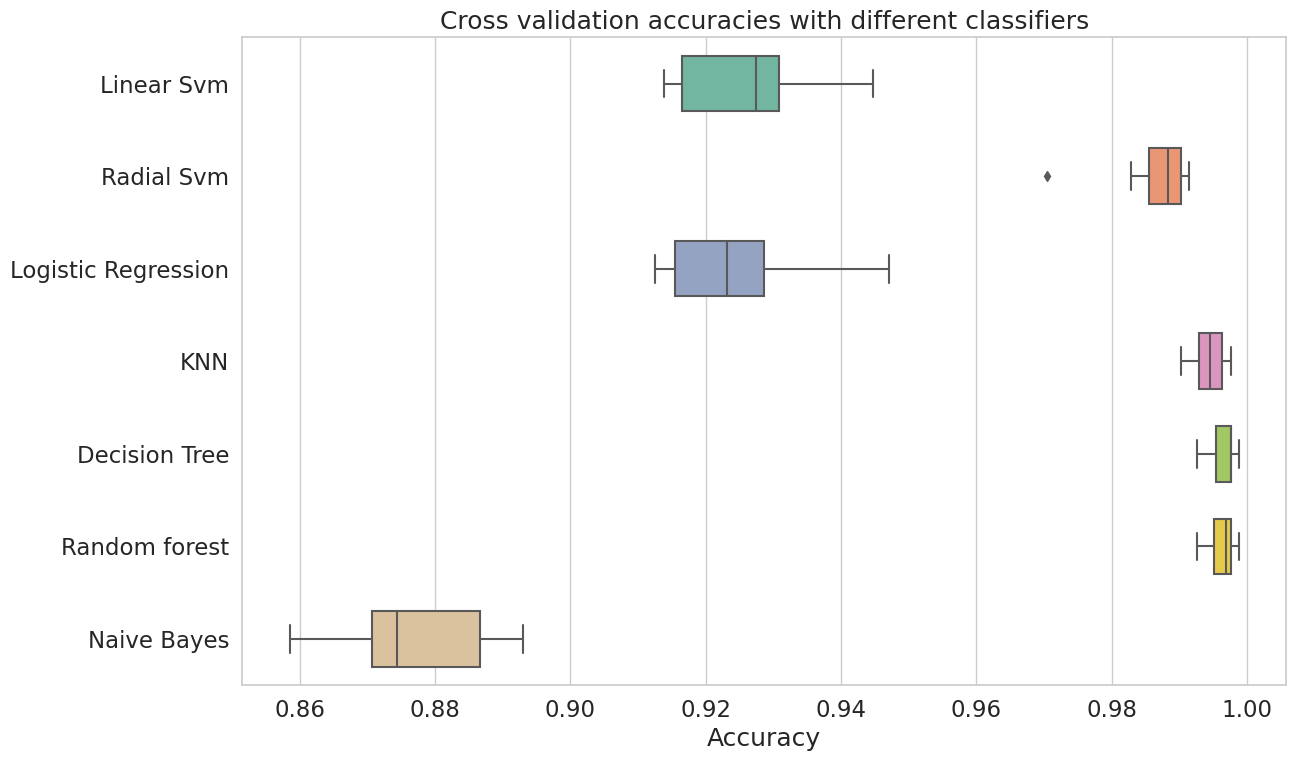

In [26]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

# **Ensembling**

In [27]:
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [28]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

## **Ensamble with 3 classifiers combined: Linear SVM, radial SVM, Log Reg**

In [29]:
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)],
                                            voting='soft', weights=[3,1,2])

ensembleModel.fit(train_X,train_Y)
predictEnsemble = ensembleModel.predict(test_X)

In [30]:
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(test_X,test_Y), 4))

Accuracy of ensembled model with all the 3 classifiers is: 0.944


# **ROC curve with AUC**

In [31]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

### **For the ensembling method**

In [32]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, predictEnsemble)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9437127783188163

Text(0.5, 0, 'False Positive Rate')

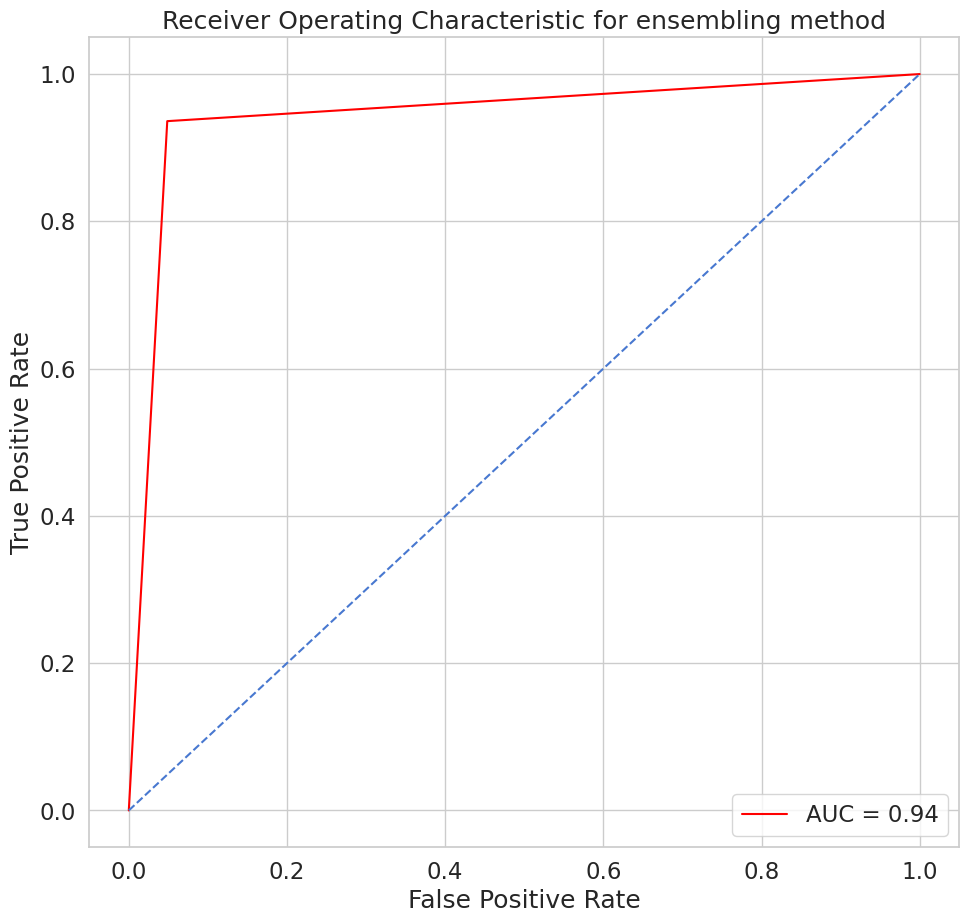

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for ensembling method')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **For all methods**

In [34]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np

# Assuming train_X, train_Y, test_X, and test_Y are your training and testing sets

# Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(train_X, train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with RBF
modelSVMrbf = svm.SVC(kernel='rbf', probability=True)

# Introduce randomness into the labels for training
train_Y_random = np.random.choice([0, 1], size=len(train_Y))
modelSVMrbf.fit(train_X, train_Y_random)

y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:, 1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

# SVM with Linear
modelSVMlinear = svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X, train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:, 1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X, train_Y_random)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:, 1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)

# Decision Tree
modelTree = DecisionTreeClassifier(random_state=0)
modelTree.fit(train_X, train_Y_random)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:, 1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Random Forest
modelRF = RandomForestClassifier(n_estimators=100, random_state=0)
modelRF.fit(train_X, train_Y_random)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)

# Naive Bayes
modelNB = GaussianNB()
modelNB.fit(train_X, train_Y_random)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

# Ensemble
y_pred_prob_en = ensembleModel.predict_proba(test_X)[:, 1]
fpr_en, tpr_en, thresholds_en = roc_curve(test_Y, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(test_Y, y_pred_prob_en)


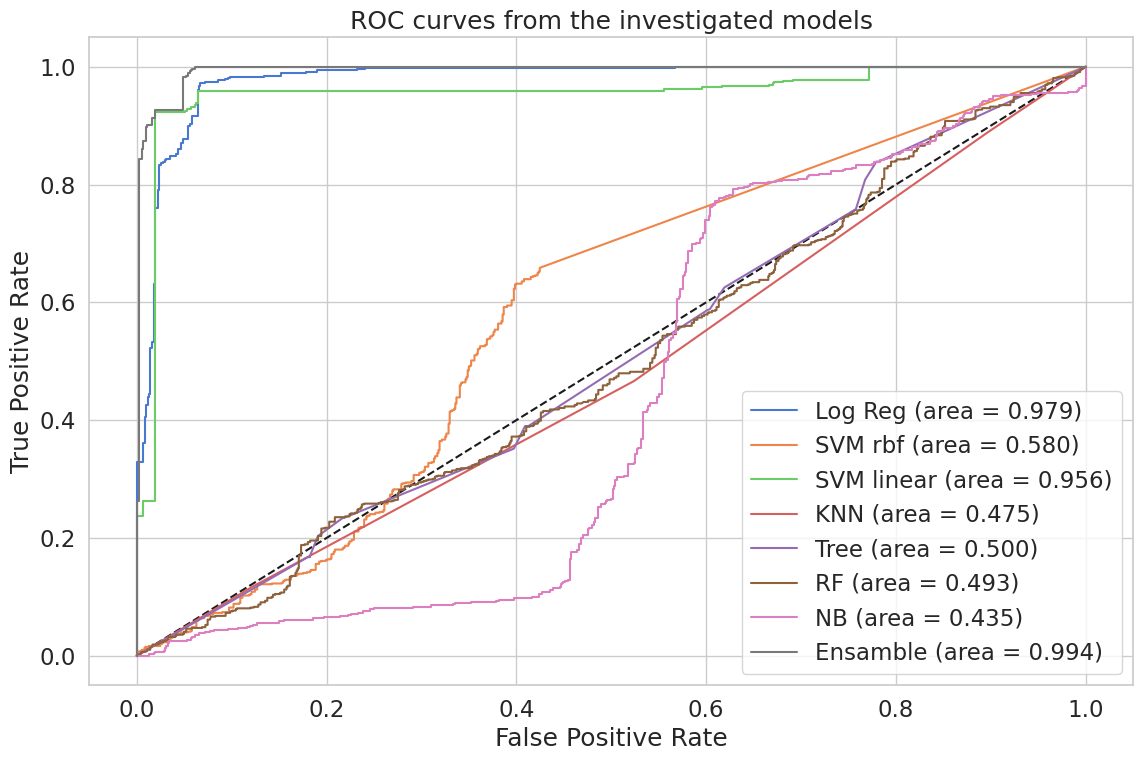

In [35]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

## **Precision-recall curve comparing the models**

Information retrieval researchers define parameters called *recall* and *precision*:
\begin{equation*}
    \begin{split}
        {recall} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are relevant}}\\
        {precision} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are retrieved }}
    \end{split}
\end{equation*}


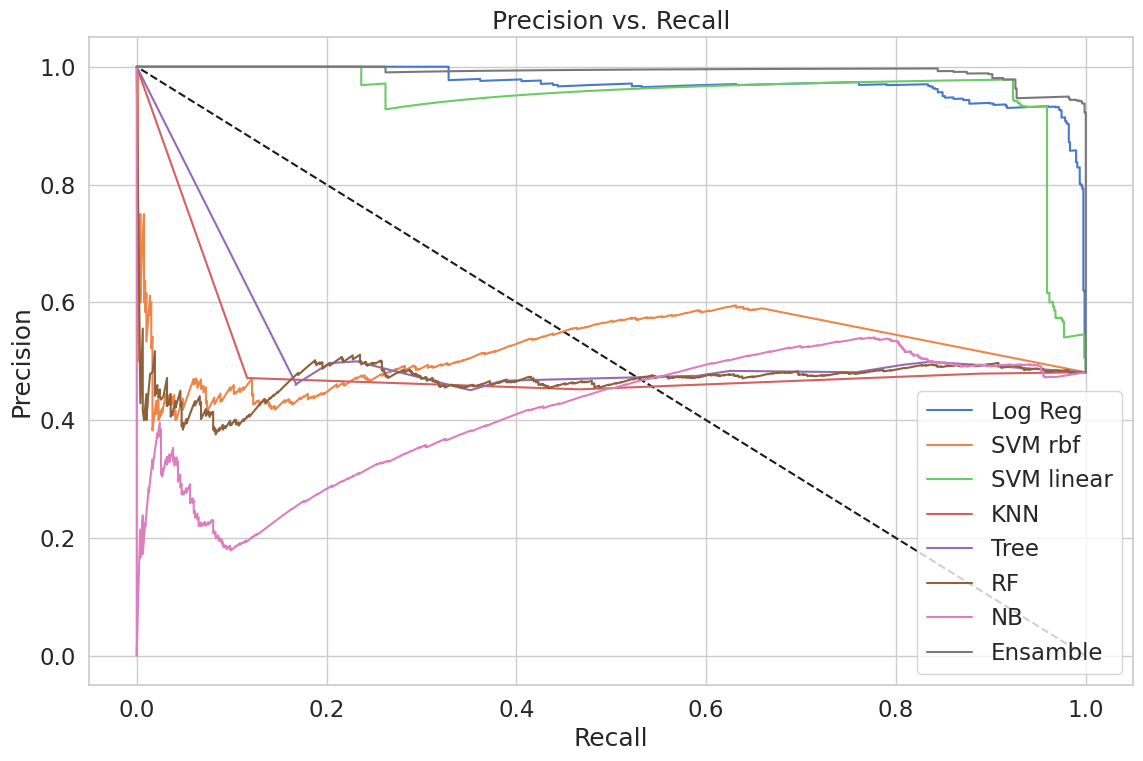

In [36]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_en, precision_en, label='Ensamble')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# **Predictive Outcomes**

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

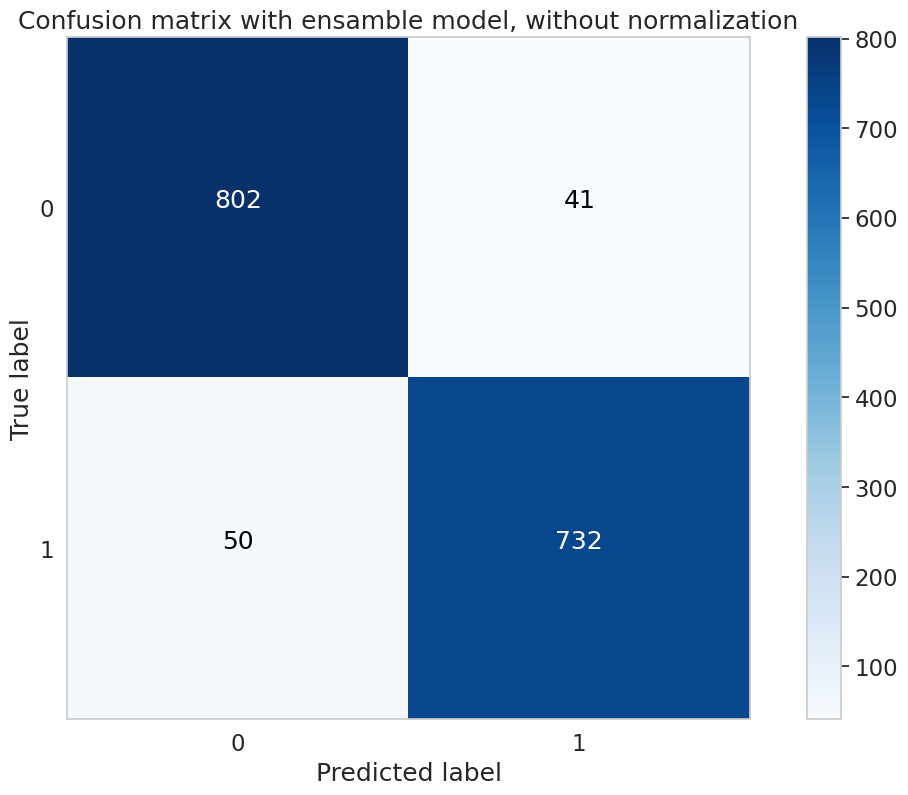

In [38]:
class_names = test_Y.unique()
cmEnsamble = confusion_matrix(test_Y, predictEnsemble)
plt.grid(False)
plot_confusion_matrix(cmEnsamble, classes=class_names, title='Confusion matrix with ensamble model, without normalization')


## **Classification Report**

In [39]:
print(metrics.classification_report(test_Y, predictEnsemble))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       843
           1       0.95      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



# **Cost-sensitive learning**

##  Neural Network with Keras**

Keras is a high level frame work for running neural network applications. It runs tensorflow at the backend.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(42)

In [41]:
train_Y = to_categorical(train_Y, num_classes = 2)
test_Y = to_categorical(test_Y, num_classes = 2)

In [42]:
# Confirm the train-test split ratio
print(np.shape(train_X))
print(np.shape(train_Y))
print(np.shape(test_X))
print(np.shape(test_Y))

(6499, 17)
(6499, 2)
(1625, 17)
(1625, 2)


## **1. Create the model using Keras**

input_dim = 8 since we have 8 input variable.
Here we are using 5 fully connected layers defined by using the Dense class (no particular reason for 5 layers, typically more layers are better). Number of neurons in the layers are the first argument (8, 12, 12, 8, 4 & 1 respecitvely here).
We use the default weight initialization in Keras which is between 0 to 0.05 assuming "uniform" distribution.
First 4 layers have "relu" activation and output layer has "sigmoid" activation. Sigmoid on the output layer ensures that we have output between 0 and 1.

We can piece it all together by adding each layer.


In [43]:
# A regularizer that applies a L2 regularization penalty.
# The L2 regularization penalty is computed as: loss = l2 * reduce_sum(square(x))
# Try the model with and without the regularizer

model = Sequential()
model.add(Dense(8, input_dim=17, activation='relu'))
model.add(Dense(12, input_dim=17, activation='relu'))
model.add(Dense(12, input_dim=17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 558 (2.18 KB)
Trainable params: 558 (2.18 

## **2. Compile the model**

Now the model is ready, we can compile it (using tensorflow under the hood or backend) and train it find the best weights for prediction. loss='binary_crossentropy' since the problem is binary classification.
optimizer='adam' since it is efficient and default default.
From metrics we collect the accuracy.


In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **3. Fit model**

We train the model by calling fit() on training data.
The number of iteration through the whole training datset is called "epoch". It is set to 150 (higher the better).
The number of instances that are evaluated before a weight update in the network is performed is the the batch size. It is set to 50 (relatively small, the dataset is also small).

With the model.fit(), we shall also capture the accuracy each epoch.


In [46]:
epoch = 100
batch_size = 32

history = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epoch,
          validation_data = (test_X, test_Y), verbose = 2)

Epoch 1/100
204/204 - 2s - loss: 0.5488 - accuracy: 0.7621 - val_loss: 0.4166 - val_accuracy: 0.9065 - 2s/epoch - 10ms/step
Epoch 2/100
204/204 - 0s - loss: 0.3087 - accuracy: 0.9161 - val_loss: 0.2026 - val_accuracy: 0.9292 - 454ms/epoch - 2ms/step
Epoch 3/100
204/204 - 0s - loss: 0.1186 - accuracy: 0.9625 - val_loss: 0.0490 - val_accuracy: 0.9846 - 451ms/epoch - 2ms/step
Epoch 4/100
204/204 - 0s - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0200 - val_accuracy: 0.9957 - 472ms/epoch - 2ms/step
Epoch 5/100
204/204 - 1s - loss: 0.0195 - accuracy: 0.9949 - val_loss: 0.0109 - val_accuracy: 0.9975 - 521ms/epoch - 3ms/step
Epoch 6/100
204/204 - 1s - loss: 0.0109 - accuracy: 0.9985 - val_loss: 0.0060 - val_accuracy: 0.9994 - 505ms/epoch - 2ms/step
Epoch 7/100
204/204 - 0s - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 1.0000 - 446ms/epoch - 2ms/step
Epoch 8/100
204/204 - 0s - loss: 0.0020 - accuracy: 0.9997 - val_loss: 8.7571e-04 - val_accuracy: 1.0000 - 449ms/epoch -

## **4. Evaluate model**

We evaluate the model on test dataset and obtain the score and accuracy.
Score is the evaluation of the loss function for a given input.


In [47]:
score, acc = model.evaluate(test_X, test_Y)
print('Test score:', score)
print('Test accuracy:', acc)

51/51 [==============================] - 0s 3ms/step - loss: 2.2732e-09 - accuracy: 1.0000
Test score: 2.2731805326969834e-09
Test accuracy: 1.0


### **Training and validation curves vs. epoch**

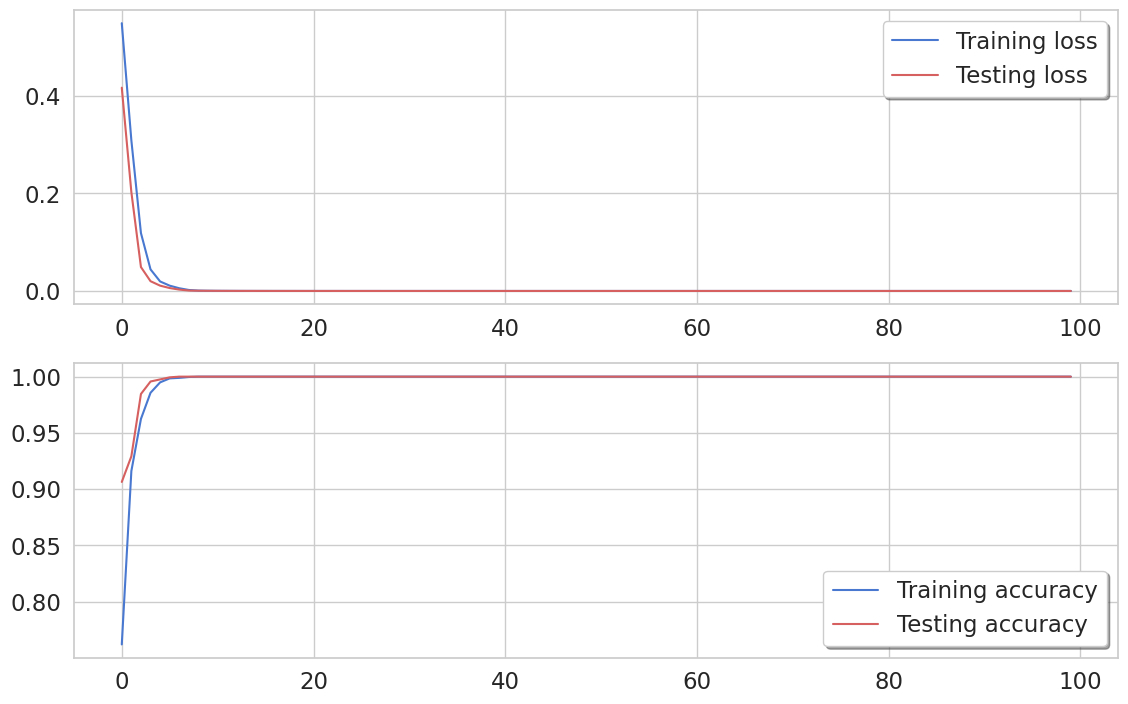

In [48]:
# Plot the loss and accuracy curves for training and validation vs. epochs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

### **Confusion matrix using this model**

Let us have a look at the correct and misclasssification in the confusion matrix.
I am using the below function for confusion matrix.

51/51 [==============================] - 0s 2ms/step


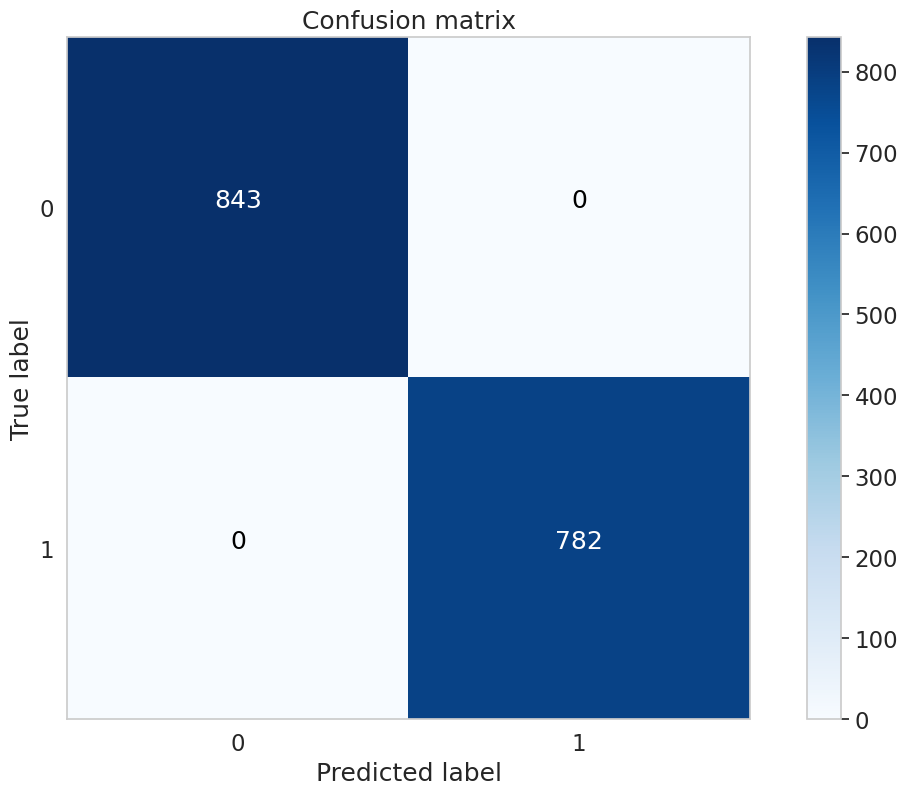

In [49]:
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.grid(False)
plt.show()